# 군집모델
# kMeans Clustering
1. 초기 중심 설정
2. 가까운 중심 기준으로 클러스터 할당
3. 각 크러스터마다 새로운 중심 계산
4. 클러스터 재할당

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
#군집화를 보여주기 위한 데이터
#4개 영역의 2차원 자료의 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, 
                  centers=4, 
                  cluster_std = 0.60, 
                  random_state = 0)

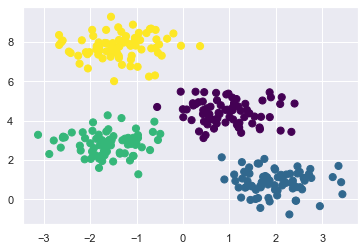

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis' , s=50) #s : marker size
#c=y : 각 점이 속한 클러스터 번호는 y에 저장되어 있음
plt.show()

In [4]:
#K-means 군집화 모델 인스턴스화 및 학습
#k-means clustering
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4)
model.fit(X)

KMeans(n_clusters=4)

In [5]:
pred = model.predict(X)

In [6]:
print(pred)

[1 0 2 0 1 1 3 2 0 0 3 0 2 0 1 2 2 1 3 3 1 1 2 3 3 2 1 2 3 2 0 0 2 0 0 0 0
 0 3 1 2 3 2 2 3 3 0 3 0 1 3 1 0 1 1 3 0 3 0 1 0 2 0 3 3 3 0 1 0 3 2 3 0 3
 3 0 3 2 1 0 1 2 1 1 0 2 1 2 0 0 2 1 0 3 3 2 1 1 2 3 0 1 0 1 2 1 1 2 0 2 3
 3 1 0 1 2 0 1 1 2 3 1 3 1 1 1 1 3 1 3 0 3 3 1 0 3 3 0 2 0 0 3 2 3 2 3 0 2
 0 0 0 2 0 2 1 3 0 3 1 2 0 2 2 1 2 3 3 2 1 2 2 0 1 2 3 0 1 1 2 3 1 2 3 3 2
 2 2 2 1 0 2 3 2 2 3 3 3 2 3 0 2 3 1 3 2 0 3 0 2 0 2 3 2 2 0 3 3 1 1 2 0 1
 1 3 1 3 2 0 0 2 2 0 2 1 3 2 1 3 0 3 1 2 1 0 0 0 0 3 3 0 2 3 1 2 3 3 3 1 1
 0 2 2 3 1 0 3 2 0 2 1 1 3 3 2 1 1 1 2 0 0 1 1 2 1 1 1 0 3 0 2 1 1 0 0 0 1
 1 2 0 3]


In [7]:
print(model.cluster_centers_) #좌표값

[[-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.58438467  2.83081263]]


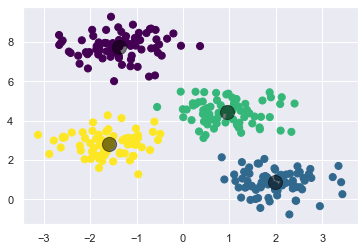

In [9]:
#K-means 군집화-결과 시각화
# 그룹별로 색깔을 달리해 표현하기, 군집 중앙 표시
plt.scatter(X[:,0], X[:,1], c=pred, s=50, cmap = 'viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='black',
            s=200, alpha=0.5)
plt.show()

#### K-평균 군집은 선형 군집 경계로 한정된다.

In [11]:
#비선형 경계를 가지는 자료의 생성
from sklearn.datasets import make_moons
X, y = make_moons(200, noise = 0.05, random_state = 0)

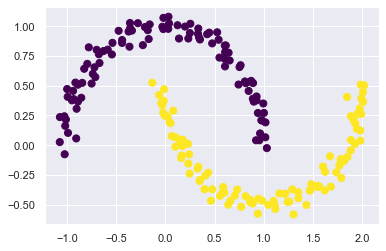

In [13]:
plt.scatter(X[:,0], X[:, 1], c = y, cmap = 'viridis', s = 50)
plt.show()

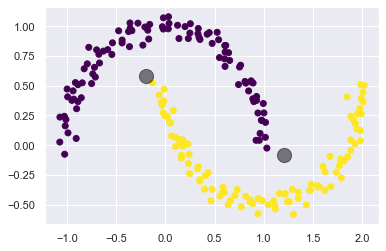

In [15]:
model = KMeans(n_clusters = 2)
pred = model.fit_predict(X)

plt.scatter(X[:,0], X[:, 1], c = y, cmap = 'viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='black',
            s=200, alpha=0.5)
plt.show()            

## digits clustering
- 필기체 숫자 인식에의 적용

In [16]:
#1. 데이터의 준비
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [17]:
#2. 학습 및 예측
#k-means clustering
model = KMeans(n_clusters = 10, random_state = 0)
pred = model.fit_predict(digits.data)

In [18]:
print(pred[0:50])

[5 7 7 1 0 3 9 4 3 3 5 6 8 1 0 2 9 4 7 3 5 6 8 1 6 2 9 4 7 3 5 3 2 2 9 2 5
 3 7 3 7 0 6 4 4 1 2 6 5 5]


In [19]:
print(digits.target[0:50])

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0]


In [20]:
c_idx = np.where(pred == 5) #pred값이 5인 index만 추출
d_idx = np.where(digits.target == 0)
print(len(d_idx[c_idx == d_idx]))
print()
print(d_idx[c_idx == d_idx])

178

[   0   10   20   30   36   48   49   55   72   78   79  101  126  130
  140  150  160  166  178  179  185  202  208  209  229  252  256  266
  276  286  292  304  305  311  328  334  335  357  382  386  396  406
  416  422  434  435  441  458  464  465  487  512  516  526  536  546
  552  564  565  571  588  594  595  617  642  646  656  666  676  682
  694  695  701  718  724  725  747  772  776  786  796  806  812  824
  825  831  848  854  855  877  902  915  925  935  941  957  974  980
  981 1002 1025 1029 1039 1049 1059 1065 1077 1078 1082 1099 1105 1106
 1128 1153 1157 1167 1177 1187 1193 1205 1206 1212 1229 1235 1236 1258
 1283 1287 1297 1307 1317 1323 1335 1336 1342 1359 1365 1366 1388 1413
 1415 1425 1435 1445 1451 1463 1464 1470 1487 1493 1494 1516 1541 1545
 1555 1563 1573 1579 1591 1592 1598 1615 1620 1642 1663 1667 1677 1687
 1697 1703 1715 1716 1722 1739 1745 1746 1768 1793]


C:\Users\ictai\AppData\Local\Temp\ipykernel_3216\420434299.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(len(d_idx[c_idx == d_idx]))
C:\Users\ictai\AppData\Local\Temp\ipykernel_3216\420434299.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(d_idx[c_idx == d_idx])


In [21]:
#3. 클러스터 중심 확인
model.cluster_centers_.shape #8*8 군집 10개

(10, 64)

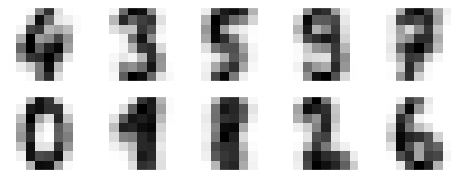

In [22]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = model.cluster_centers_.reshape(10, 8, 8)

for axi, center in zip(ax.flat, centers): #ax.flat: 2차원을 1차원으로 변경
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', 
               cmap=plt.cm.binary)

In [23]:
#4. 성능 평가
from scipy.stats import mode
labels = np.zeros_like(pred)
for i in range(10):
    mask = (pred == i)
    #mode : 가장 출현 빈도가 높은 값과 출현 빈도를 tuple로 반환
    labels[mask] = mode(digits.target[mask])[0] #출현빈도 가장 많은 값
    print('cluster #%3d:'%i)
    print('mask:', mask[:30])
    print('digits.target[mask]:', digits.target[mask][:30])
    print('max freq. number:', mode(digits.target[mask])[0])
    print('labels:', labels[:30],'\n')
    

cluster #  0:
mask: [False False False False  True False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False]
digits.target[mask]: [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
max freq. number: [4]
labels: [0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

cluster #  1:
mask: [False False False  True False False False False False False False False
 False  True False False False False False False False False False  True
 False False False False False False]
digits.target[mask]: [3 3 3 3 3 3 3 3 3 3 3 9 3 3 3 3 9 3 3 3 3 3 3 3 3 3 3 3 3 3]
max freq. number: [3]
labels: [0 0 0 3 4 0 0 0 0 0 0 0 0 3 4 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0] 

cluster #  2:
mask: [False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False  True False False False False]
digits.target[mask]: [5 5 5 5 5 5 

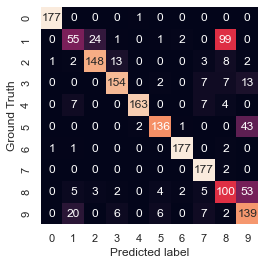

In [24]:
#숫자 군집 성능
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
           xticklabels = digits.target_names,
           yticklabels = digits.target_names)
plt.ylabel('Ground Truth')
plt.xlabel('Predicted label')
plt.show()

# DBSCAN
- 노이즈에 강한 군집 모델
- 밀도있게 연결되어 있는 데이터 집합을 동일한 클러스터로 결정함
- 일정한 밀도를 가지는 데이터 무리가 체인처럼 연결되어 있으면 거리의 개념과 관계없이 같은 클러스터로 판단함

In [25]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise = 0.05, random_state = 0)

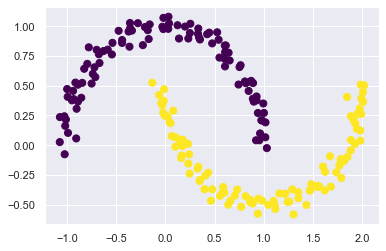

In [26]:
plt.scatter(X[:,0], X[:, 1], c = y, cmap = 'viridis', s = 50)
plt.show()

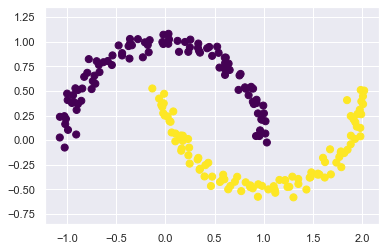

In [27]:
#클래스 인스턴스화, 클러스터링
from sklearn.cluster import DBSCAN
labels = DBSCAN(eps = 0.3, min_samples = 15).fit_predict(X) #eps:반지름, min_samples:최소개수

plt.scatter(X[:,0], X[:, 1], c = labels, cmap = 'viridis', s = 50)
plt.axis('equal')
plt.show()

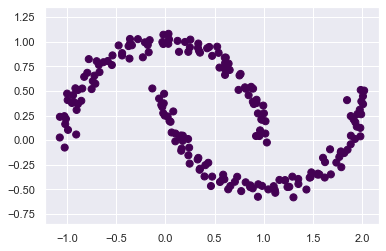

In [28]:
labels = DBSCAN(eps = 0.5, min_samples = 10).fit_predict(X) #eps:반지름, min_samples:최소개수

plt.scatter(X[:,0], X[:, 1], c = labels, cmap = 'viridis', s = 50)
plt.axis('equal')
plt.show()

# PCA
- 주성분 정보를 벡터와 길이로 분석

### 주성분 분석

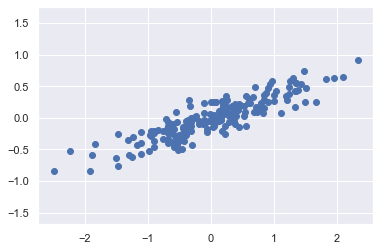

In [29]:
#PCA를 위한 자료 준비
rng = np.random.RandomState(1)
X =  np.dot( rng.rand(2,2), rng.randn(2, 200) ).T #(2, 200).T -> (200, 2) #내적
plt.scatter(X[:,0], X[:, 1])
plt.axis('equal')
plt.show()

In [30]:
from sklearn.decomposition import PCA
mypca = PCA(n_components = 2)
mypca.fit(X)

PCA(n_components=2)

In [31]:
print(mypca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [32]:
print(mypca.explained_variance_)

[0.7625315 0.0184779]


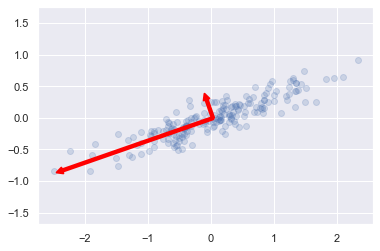

In [33]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(color='red', #선 색
                      arrowstyle='simple', #화살표 스타일
                     linewidth=2, #선 두께
                     shrinkA=0, shrinkB=0 ) #크기 조절
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# data plotting
plt.scatter(X[:, 0], X[:,1], alpha=0.2)
for length, vector in zip(mypca.explained_variance_, mypca.components_):
    v = vector * 3* np.sqrt(length)
    draw_vector(mypca.mean_, mypca.mean_ + v)
plt.axis('equal')
plt.show()

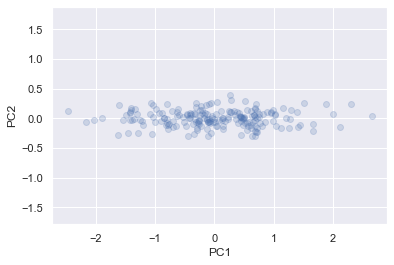

In [35]:
#주성분 축으로 그래프 그리기
X_t = mypca.transform(X)

plt.scatter(X_t[:,0], X_t[:,1], alpha = 0.2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal')
plt.show()

In [36]:
#14개의 주성분 추출
digits_pca = PCA(14)
digits_pca.fit(digits.data)

PCA(n_components=14)

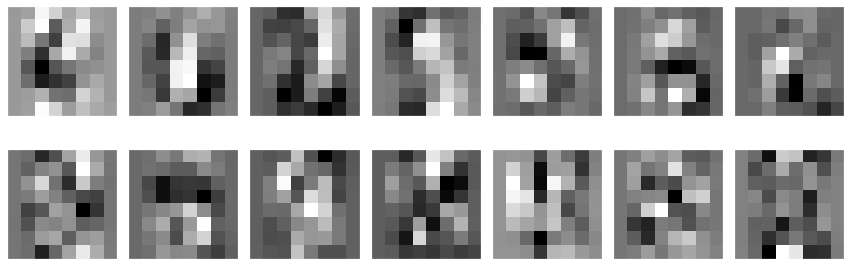

In [37]:
#주성분 보기
fig, axes = plt.subplots(2, 7, figsize=(15,5),
                         subplot_kw={'xticks':[], 
                                     'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, 
                                         wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits_pca.components_[i].reshape(8,8), 
              interpolation='nearest', 
               cmap=plt.cm.binary)
plt.show()

In [38]:
#14개의 주성분 비율 확인 및 변환
digits_pca.explained_variance_ratio_ #큰값~작은값 순서

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661372, 0.03353247, 0.03078805,
       0.02372333, 0.02272685, 0.01821781, 0.01773272])

In [39]:
digits_t = digits_pca.transform(digits.data)
digits_t.shape

(1797, 14)

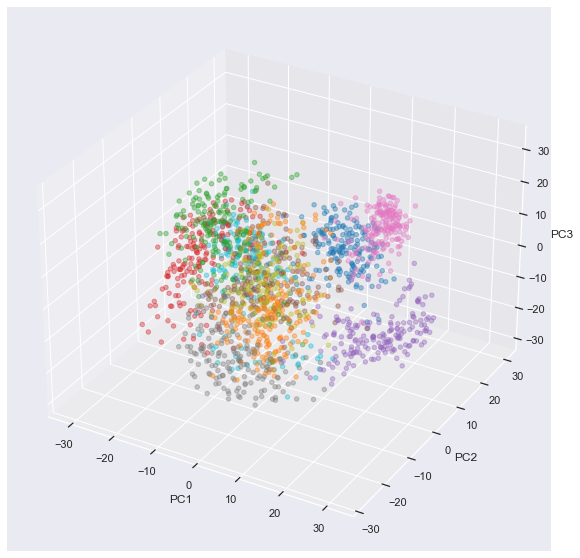

In [40]:
# 각 글자를 PC1, PC2, PC3  추축으로 3차원 위에 한 개의 점으로 표시
fig = plt.figure( figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(digits_t[:, 0], digits_t[:, 1], digits_t[:, 2], #주성분
            c=digits.target, alpha=0.4, cmap='tab10'  )
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show() 

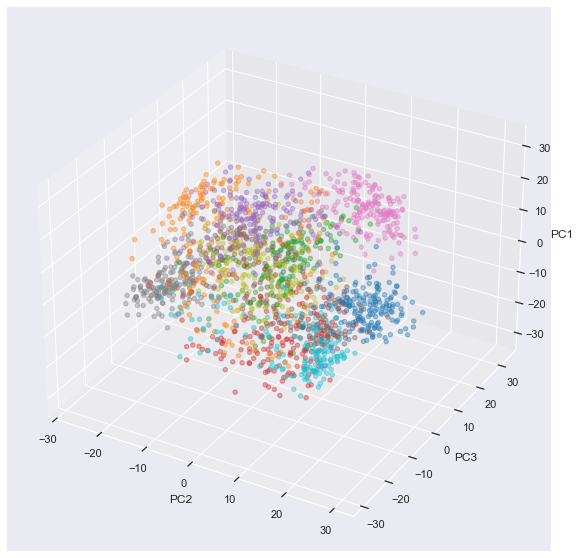

In [41]:
# 각 글자를 PC2, PC3, PC1  추축으로 3차원 위에 한 개의 점으로 표시
# 축 돌려가면서 보기
fig = plt.figure( figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter3D( digits_t[:, 1], digits_t[:, 2],digits_t[:, 0],
            c=digits.target, alpha=0.4, cmap='tab10'  )
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')
ax.set_zlabel('PC1')
plt.show() 

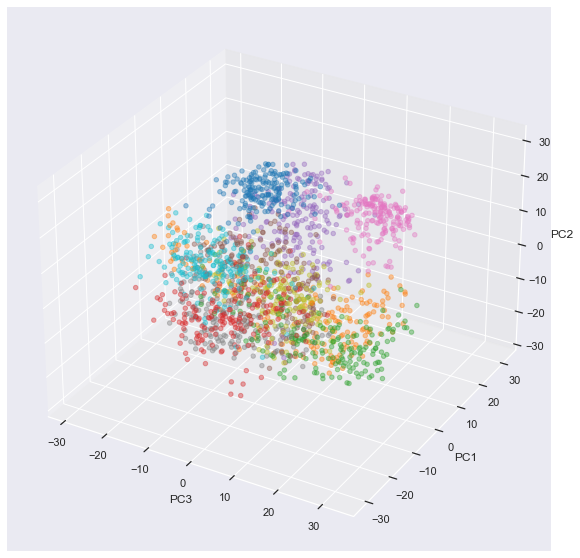

In [42]:
# 각 글자를 PC3, PC1, PC2  추축으로 3차원 위에 한 개의 점으로 표시
# 축 돌려가면서 보기
fig = plt.figure( figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter3D( digits_t[:, 2], digits_t[:, 0],digits_t[:, 1],
            c=digits.target, alpha=0.4, cmap='tab10'  )
ax.set_xlabel('PC3')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
plt.show() 

In [ ]:
# 역변환
X_new =  
plt.scatter(X[:,0], X[:,1], alpha = 0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)
plt.axis('equal')
plt.show()